In [ ]:
!pip install opencv-python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import keras
from sklearn.metrics import f1_score
import cv2
from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D, Input, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.applications.resnet50 import ResNet50
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
datapath = "dataset/"
img_width, img_height = 224,224
classes = ["manipuri", "bharatanatyam", "odissi", "kathakali", "kathak", "sattriya", "kuchipudi", "mohiniyattam"]
class_names_label = {classes:i for i, classes in enumerate(set(classes))}
num_classes = len(classes)

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
def load_images(path):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_width, img_height),interpolation=cv2.INTER_CUBIC)
    return resized

def norm_images(images):
    images = np.array(images,dtype = 'float32') / 255.  
    mean_img = np.mean(images,axis = 0)
    std_img = np.std(images,axis = 0)
    norm_img = (images - mean_img)/std_img
    return norm_img
#     return images

def load_dataset(folder_name):
    images = []
    labels = []
    label_file = pd.read_csv(os.path.join(datapath,folder_name+".csv"))
    for file in tqdm(os.listdir(os.path.join(datapath,folder_name))):
        if(folder_name == "train"):
            label = class_names_label[label_file[label_file["Image"] == file]["target"].values[0]]
            labels.append(label)
        else:
            labels.append(file)
        image = load_images(os.path.join(datapath,folder_name,file))
#         image = norm_images(image)
        images.append(image)
    images = norm_images(images)
    return (images,labels)

In [5]:
(x_train, y_train)=load_dataset("train")
x_train,y_train = shuffle(x_train,y_train,random_state = 42)
(x_test, img_name) = load_dataset("test")
y_train = np.array(y_train, dtype = 'int16')
y_train = to_categorical(y_train)

print(y_train.shape)

100%|██████████| 156/156 [00:00<00:00, 156.60it/s]


(364, 8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

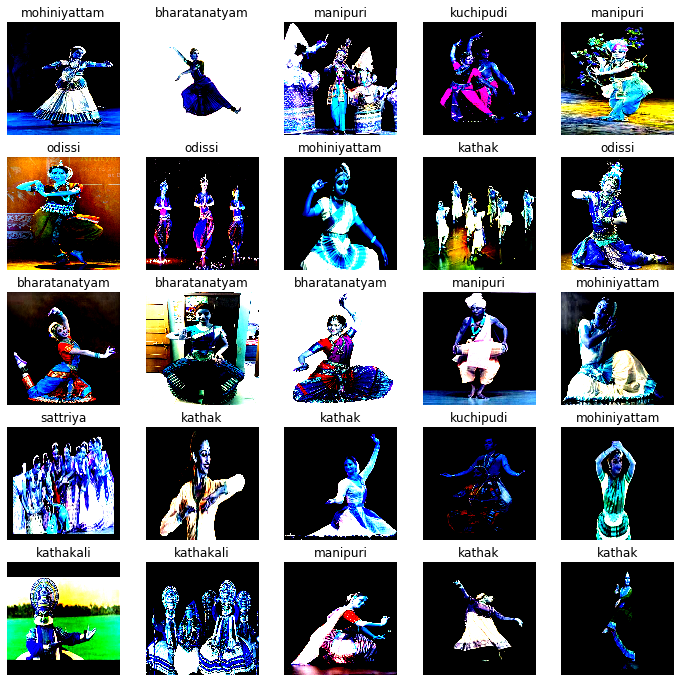

In [5]:
def show_batch(image_batch, label_batch):
    y_maps = dict()
    y_maps = {v:k for k,v in class_names_label.items()}
#     print(y_maps)
    plt.figure(figsize=(12,12))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        pred = np.argmax(label_batch[n])
#         print(pred)
        plt.title(y_maps[pred])
        plt.axis('off')
show_batch(x_train,y_train)

In [6]:
def generate_sol(name, model):
    predictions = model.predict(x_test)
    predictions = np.argmax(predictions,axis = 1)
    y_maps = dict()
    y_maps = {v:k for k,v in class_names_label.items()}
    print(y_maps)
    print(predictions)
    pred_labels = [y_maps[k] for k in predictions]
    print(pred_labels)
    sub = pd.DataFrame({'Image':img_name,'target':pred_labels})
    model.save('weights/'+name+'weights.h5')
    sub.to_csv('solutions_experiment/'+name+'sol.csv', index = False)

In [7]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range=0.2,
        height_shift_range=0.2,
#         rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.3)
#val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow(x_train, y_train,subset="training",batch_size=32)
val_generator = datagen.flow(x_train, y_train,subset = "validation", batch_size=32)
#val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=30)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


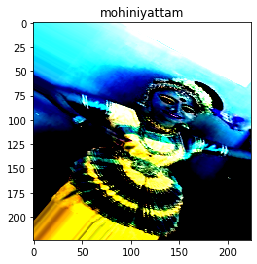

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


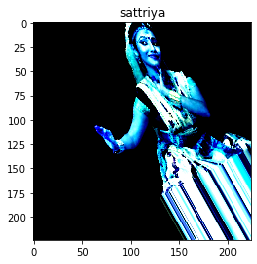

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


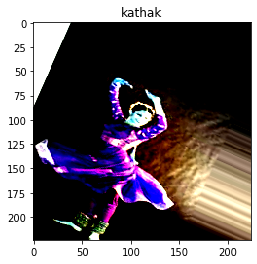

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


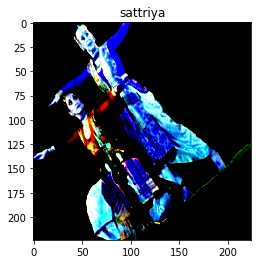

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


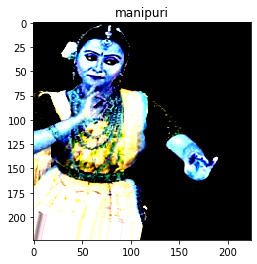

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


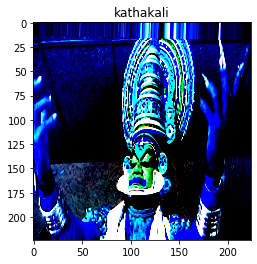

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


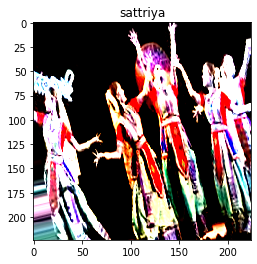

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


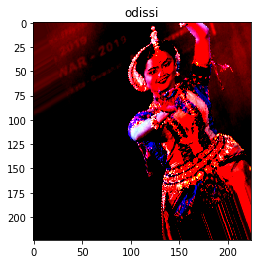

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


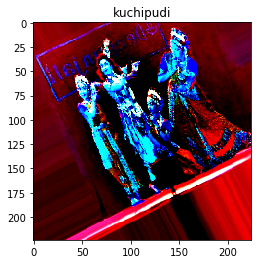

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


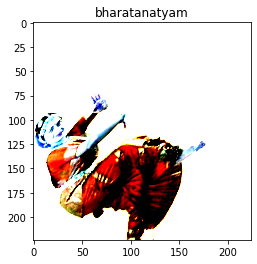

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


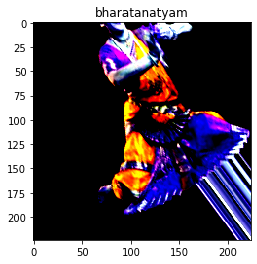

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


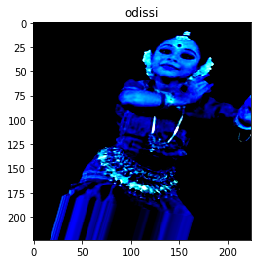

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


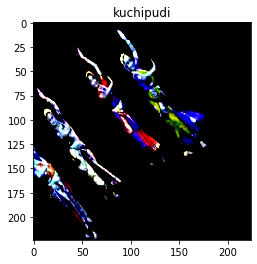

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


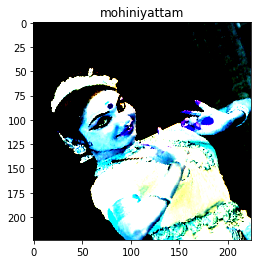

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


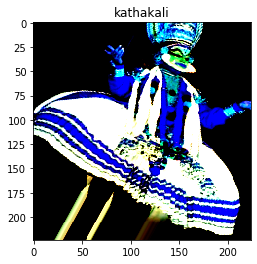

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


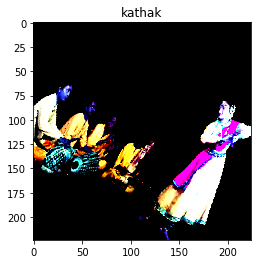

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


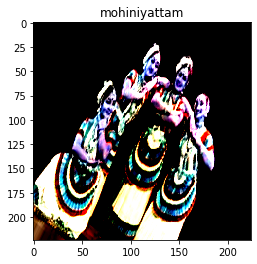

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


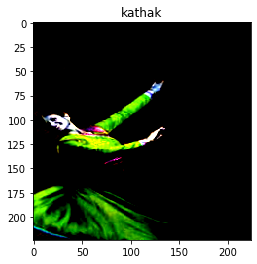

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


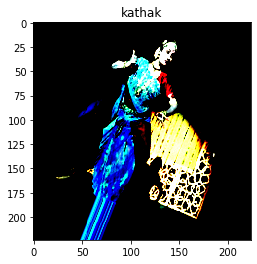

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


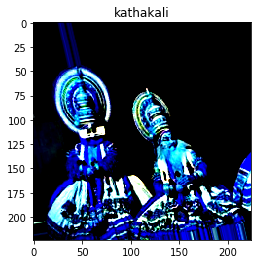

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


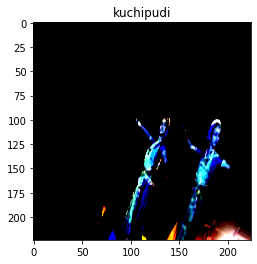

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


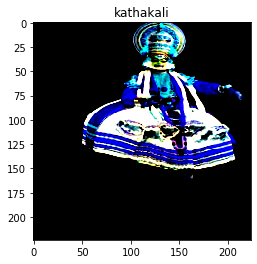

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


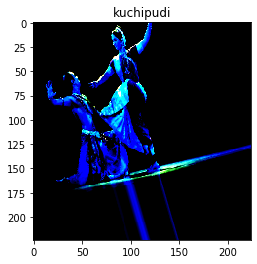

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


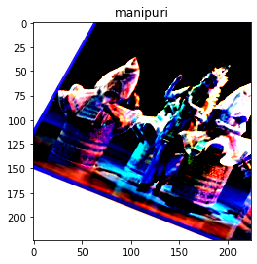

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


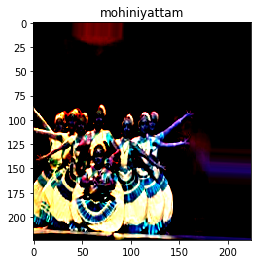

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


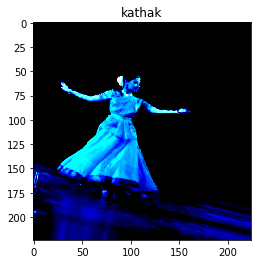

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


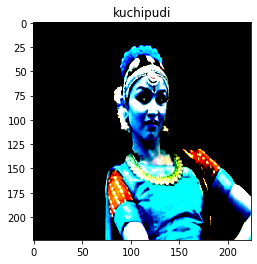

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


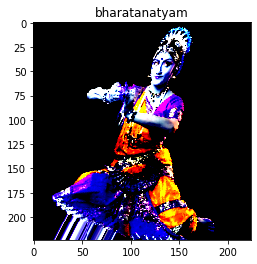

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


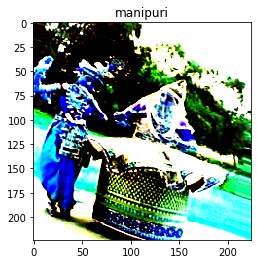

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


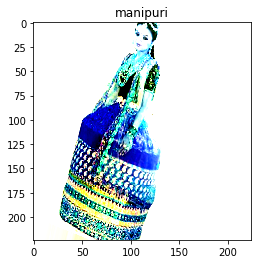

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


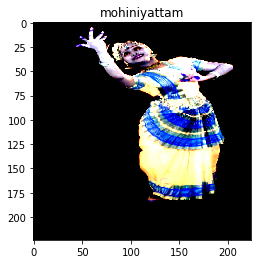

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


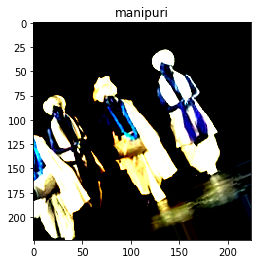

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


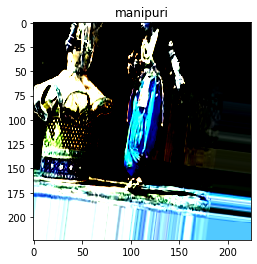

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


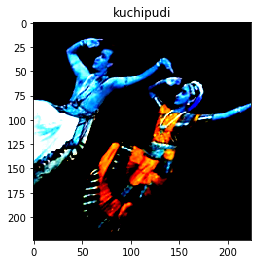

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


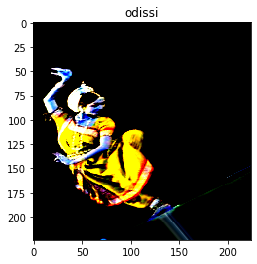

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


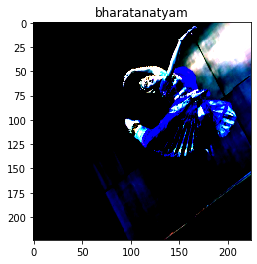

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


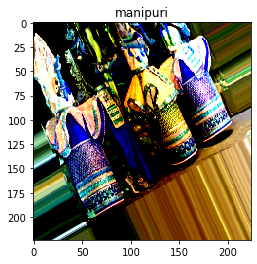

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


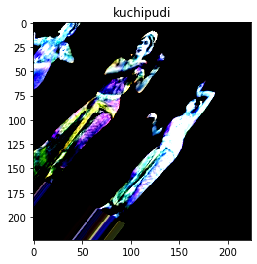

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


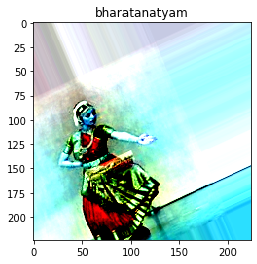

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


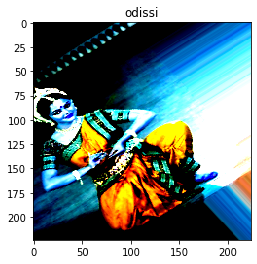

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


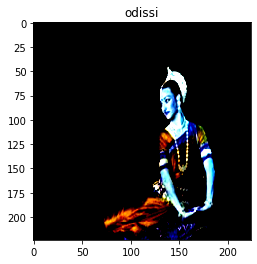

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


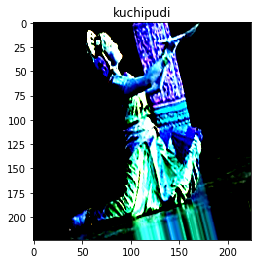

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


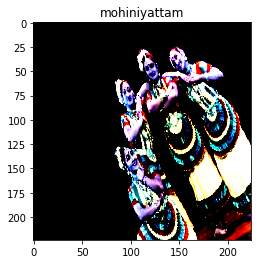

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


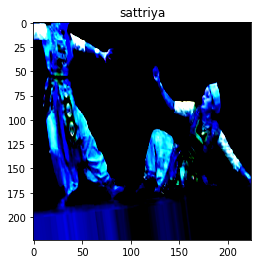

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


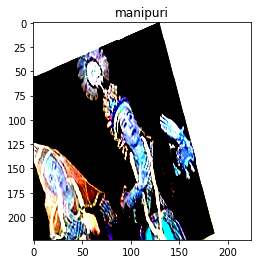

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


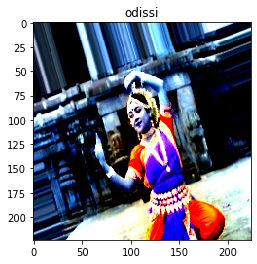

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


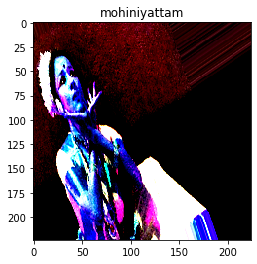

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


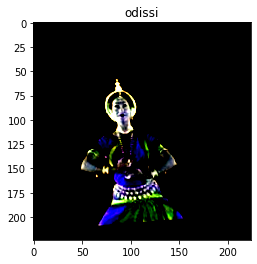

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


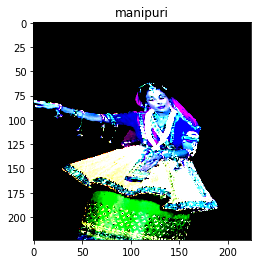

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


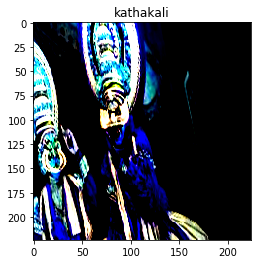

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


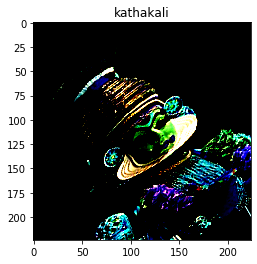

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


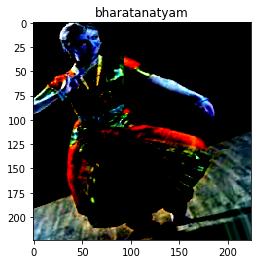

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


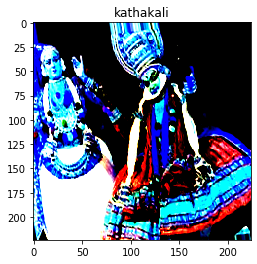

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


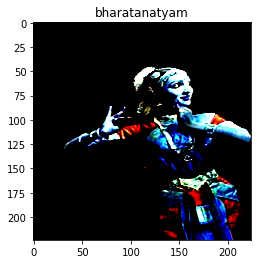

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


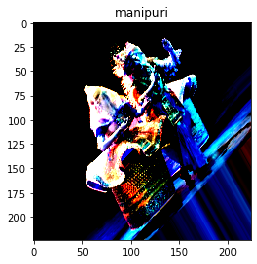

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


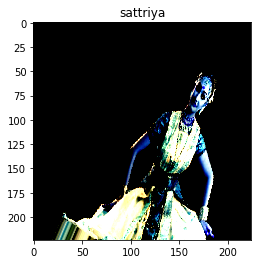

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


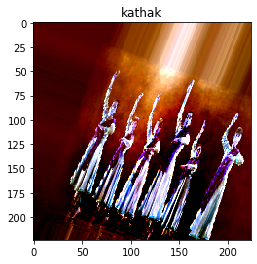

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


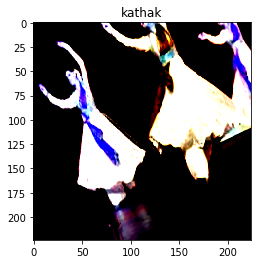

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


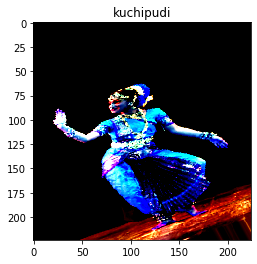

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


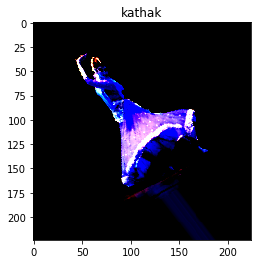

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


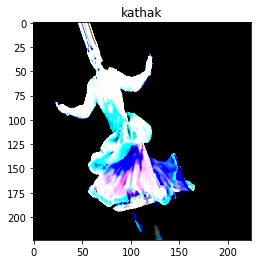

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


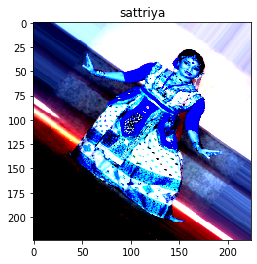

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


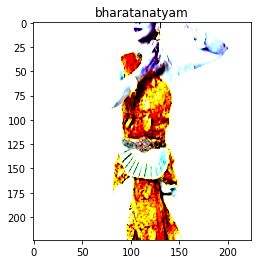

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


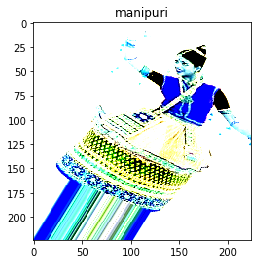

In [52]:
x_batch, y_batch = next(train_generator)
for i in range (0,64):
    y_maps = dict()
    y_maps = {v:k for k,v in class_names_label.items()}
#   
    image = x_batch[i]
    plt.title(y_maps[np.argmax(y_batch[i])])
#     print(image.shape)
    plt.imshow(image)
    plt.show()


# Experiment 1

In [26]:
cnnmodel = Sequential()
cnnmodel.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (img_width, img_height,3)))
cnnmodel.add(Convolution2D(32, (3,3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))

cnnmodel.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
cnnmodel.add(Convolution2D(64, (3,3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.25))

cnnmodel.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
cnnmodel.add(Convolution2D(128, (3,3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.25))

cnnmodel.add(Flatten())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(256, activation='relu'))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Dense(y_train.shape[1], activation='softmax'))
cnnmodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)       

In [ ]:
early_stops = EarlyStopping(patience=3, monitor='val_accuracy')

cnnmodel.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.3, callbacks=[early_stops])
generate_sol("cnn", cnnmodel)

# Experiment 1 with data augumentation

In [28]:
history = cnnmodel.fit_generator(train_generator, steps_per_epoch=100, epochs=20,
                          validation_data=val_generator, validation_steps=50, verbose=1)
generate_sol("cnndataaug1",cnnmodel)

Epoch 1/10
100/100 [==============================] - 416s 4s/step - loss: 0.6784 - accuracy: 0.7509 - val_loss: 1.8908 - val_accuracy: 0.4351
Epoch 2/10
100/100 [==============================] - 365s 4s/step - loss: 0.6144 - accuracy: 0.7811 - val_loss: 2.6814 - val_accuracy: 0.4302
Epoch 3/10
100/100 [==============================] - 367s 4s/step - loss: 0.6238 - accuracy: 0.7701 - val_loss: 2.0298 - val_accuracy: 0.4555
Epoch 4/10
100/100 [==============================] - 421s 4s/step - loss: 0.5241 - accuracy: 0.8117 - val_loss: 2.6354 - val_accuracy: 0.4390
Epoch 5/10
100/100 [==============================] - 385s 4s/step - loss: 0.4521 - accuracy: 0.8393 - val_loss: 2.7993 - val_accuracy: 0.4606
Epoch 6/10
100/100 [==============================] - 341s 3s/step - loss: 0.4796 - accuracy: 0.8231 - val_loss: 1.9550 - val_accuracy: 0.4642
Epoch 7/10
100/100 [==============================] - 334s 3s/step - loss: 0.3993 - accuracy: 0.8686 - val_loss: 1.6186 - val_accuracy: 0.4585

# Transfer Learning With ResNet50 

In [ ]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet',input_tensor=Input(shape=(img_width,img_height,3))))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.layers[0].trainable = False
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

In [ ]:
early_stops = EarlyStopping(patience=3, monitor='val_accuracy')

model.fit(x_train, y_train, batch_size=100, epochs=15, validation_split=0.3, callbacks=[early_stops])
generate_sol("pretrained")

# ResNet50 without data augumentation

In [10]:
resnet = ResNet50(include_top=False, weights='imagenet', 
                                     input_shape=(img_width, img_height,3))

output = resnet.layers[-1].output
output = Flatten()(output)

resnet = Model(resnet.input, output)
#resnet.trainable = False

for layer in resnet.layers[:-4]:
    layer.trainable = False

resnet.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [46]:
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in resnet.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0    <keras.engine.input_layer.InputLayer object at 0x1a507c090>             
1    <keras.layers.convolutional.ZeroPadding2D object at 0x1a507c190>        
2    <keras.layers.convolutional.Conv2D object at 0x1a507c2d0>               
3    <keras.layers.normalization.BatchNormalization object at 0x1a507cb50>   
4    <keras.layers.core.Activation object at 0x1a5077610>                    
..                                                    ...                    
171  <keras.layers.convolutional.Conv2D object at 0x1895e1a10>               
172  <keras.layers.normalization.BatchNormalization object at 0x1895f8550>   
173  <keras.layers.merge.Add object at 0x189608b50>                          
174  <keras.layers.core.Activation object at 0x18961e850>                    
175  <keras.layers.core.Flatten object at 0x189c7dfd0>                       

         Layer Name  Layer Trainable  
0    input_5         False            
1    conv1_pad       False            
2    conv1           False            
3    bn_conv1        False            
4    activation_197  False            
..              ...    ...            
171  res5c_branch2c  False            
172  bn5c_branch2c   True             
173  add_80          True             
174  activation_245  True             
175  flatten_5       True             

[176 rows x 3 columns]

In [47]:
print("Trainable layers:", resnet.trainable_weights)

Trainable layers: [<tf.Variable 'bn5c_branch2c_4/gamma:0' shape=(2048,) dtype=float32, numpy=
array([1.3451786, 1.3965728, 1.4453218, ..., 1.2092956, 1.5969722,
       1.4321095], dtype=float32)>, <tf.Variable 'bn5c_branch2c_4/beta:0' shape=(2048,) dtype=float32, numpy=
array([-1.4512578, -1.6519743, -1.6319023, ..., -1.6061822, -1.7218091,
       -1.9375533], dtype=float32)>]


In [41]:
model = Sequential()
model.add(resnet)
# model.add(Dense(1024, activation='relu', input_dim=(img_width, img_height,3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',lr = 1e-6, metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 100352)            23587712  
_________________________________________________________________
dropout_6 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 4104      
Total params: 74,972,552
Trainable params: 74,919,432
Non-trainable params: 53,120
_________________________________________________________________


In [40]:
early_stops = EarlyStopping(patience=3, monitor='val_accuracy')

history1 = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.3, callbacks=[early_stops])
generate_sol("withoutdataaug")

Train on 254 samples, validate on 110 samples
Epoch 1/10
254/254 [==============================] - 109s 427ms/step - loss: 39.7444 - accuracy: 0.1654 - val_loss: 122.1033 - val_accuracy: 0.1364
Epoch 2/10
254/254 [==============================] - 87s 341ms/step - loss: 9.8032 - accuracy: 0.5354 - val_loss: 1992.8186 - val_accuracy: 0.1364
Epoch 3/10
254/254 [==============================] - 88s 348ms/step - loss: 3.7384 - accuracy: 0.6220 - val_loss: 1842855.0341 - val_accuracy: 0.1364
Epoch 4/10


KeyboardInterrupt: 

# InceptionV3 with Data Augumentation

In [14]:
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam

In [15]:
pretrained_model = InceptionV3(input_shape = (224,224,3),include_top = False, weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
model_v3 = Sequential()
model_v3.add(pretrained_model)
model_v3.add(Flatten())
model_v3.add(Dense(1024,activation = 'relu'))
model_v3.add(Dropout(0.3))
model_v3.add(Dense(y_train.shape[1],activation = 'softmax'))
model_v3.compile(optimizer = Adam(lr = 0.0001),loss = 'categorical_crossentropy',metrics = ['accuracy'])



In [16]:
model_v3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              52429824  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 8200      
Total params: 74,240,808
Trainable params: 52,438,024
Non-trainable params: 21,802,784
_________________________________________________________________


In [21]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping,CSVLogger, TensorBoard
callbacks_list = [
#         ModelCheckpoint(top_weights_path, monitor='val_accuracy', verbose=1, save_best_only=True),
#         EarlyStopping(monitor='val_acc', patience=5, verbose=0),
        ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.7),
        CSVLogger(filename= "trainingv3_csv.log", separator = ",",append = False),
        TensorBoard(log_dir='tensorboard/inception-v31-train-top-layer', histogram_freq=0, write_graph=False, write_images=False)
    ]
history = model_v3.fit_generator(train_generator, epochs=200,
                          validation_data=val_generator, verbose=1,callbacks=callbacks_list)

Epoch 1/200
8/8 [==============================] - 20s 3s/step - loss: 0.6437 - accuracy: 0.8039 - val_loss: 1.3917 - val_accuracy: 0.4587
Epoch 2/200
8/8 [==============================] - 20s 2s/step - loss: 0.6008 - accuracy: 0.8588 - val_loss: 0.7762 - val_accuracy: 0.4771
Epoch 3/200
8/8 [==============================] - 19s 2s/step - loss: 0.6161 - accuracy: 0.8157 - val_loss: 2.4073 - val_accuracy: 0.3853
Epoch 4/200
8/8 [==============================] - 19s 2s/step - loss: 0.6319 - accuracy: 0.7961 - val_loss: 1.9802 - val_accuracy: 0.4128
Epoch 5/200
8/8 [==============================] - 19s 2s/step - loss: 0.6084 - accuracy: 0.8314 - val_loss: 2.8344 - val_accuracy: 0.3945

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.299347712757637e-10.
Epoch 6/200
8/8 [==============================] - 19s 2s/step - loss: 0.6559 - accuracy: 0.8196 - val_loss: 1.4696 - val_accuracy: 0.4220
Epoch 7/200
8/8 [==============================] - 19s 2s/step - loss: 0.6905 - accur

Epoch 51/200
8/8 [==============================] - 25s 3s/step - loss: 0.5713 - accuracy: 0.8392 - val_loss: 2.5238 - val_accuracy: 0.4037
Epoch 52/200
8/8 [==============================] - 24s 3s/step - loss: 0.5855 - accuracy: 0.8118 - val_loss: 1.4940 - val_accuracy: 0.4771

Epoch 00052: ReduceLROnPlateau reducing learning rate to 6.168732842246061e-13.
Epoch 53/200
8/8 [==============================] - 24s 3s/step - loss: 0.6720 - accuracy: 0.7686 - val_loss: 1.8970 - val_accuracy: 0.4679
Epoch 54/200
8/8 [==============================] - 25s 3s/step - loss: 0.6525 - accuracy: 0.7961 - val_loss: 3.2478 - val_accuracy: 0.4037
Epoch 55/200
8/8 [==============================] - 26s 3s/step - loss: 0.5925 - accuracy: 0.8392 - val_loss: 1.7756 - val_accuracy: 0.4128

Epoch 00055: ReduceLROnPlateau reducing learning rate to 4.3181131413605466e-13.
Epoch 56/200
8/8 [==============================] - 25s 3s/step - loss: 0.7070 - accuracy: 0.7804 - val_loss: 1.6032 - val_accuracy: 0.37

8/8 [==============================] - 24s 3s/step - loss: 0.7267 - accuracy: 0.7490 - val_loss: 2.3652 - val_accuracy: 0.3578

Epoch 00100: ReduceLROnPlateau reducing learning rate to 2.050050908822536e-15.
Epoch 101/200
8/8 [==============================] - 23s 3s/step - loss: 0.6960 - accuracy: 0.7647 - val_loss: 2.1629 - val_accuracy: 0.4404
Epoch 102/200
8/8 [==============================] - 22s 3s/step - loss: 0.6982 - accuracy: 0.7843 - val_loss: 1.9175 - val_accuracy: 0.4404
Epoch 103/200
8/8 [==============================] - 20s 2s/step - loss: 0.6074 - accuracy: 0.8118 - val_loss: 1.2090 - val_accuracy: 0.4587

Epoch 00103: ReduceLROnPlateau reducing learning rate to 1.435035680645005e-15.
Epoch 104/200
8/8 [==============================] - 20s 3s/step - loss: 0.6153 - accuracy: 0.8157 - val_loss: 2.1421 - val_accuracy: 0.4220
Epoch 105/200
8/8 [==============================] - 22s 3s/step - loss: 0.7632 - accuracy: 0.7569 - val_loss: 3.0345 - val_accuracy: 0.4037
Epoch 

8/8 [==============================] - 21s 3s/step - loss: 0.6777 - accuracy: 0.7843 - val_loss: 2.6335 - val_accuracy: 0.4862
Epoch 150/200
8/8 [==============================] - 19s 2s/step - loss: 0.6429 - accuracy: 0.7647 - val_loss: 1.8227 - val_accuracy: 0.4312
Epoch 151/200
8/8 [==============================] - 20s 3s/step - loss: 0.6658 - accuracy: 0.8118 - val_loss: 2.1842 - val_accuracy: 0.5046

Epoch 00151: ReduceLROnPlateau reducing learning rate to 4.769043481789354e-18.
Epoch 152/200
8/8 [==============================] - 22s 3s/step - loss: 0.6569 - accuracy: 0.7686 - val_loss: 1.6386 - val_accuracy: 0.4404
Epoch 153/200
8/8 [==============================] - 24s 3s/step - loss: 0.6056 - accuracy: 0.8118 - val_loss: 1.4721 - val_accuracy: 0.4771
Epoch 154/200
8/8 [==============================] - 22s 3s/step - loss: 0.6289 - accuracy: 0.8157 - val_loss: 2.5411 - val_accuracy: 0.4312

Epoch 00154: ReduceLROnPlateau reducing learning rate to 3.3383305530578334e-18.
Epoch

Epoch 198/200
8/8 [==============================] - 27s 3s/step - loss: 0.5629 - accuracy: 0.8275 - val_loss: 1.5235 - val_accuracy: 0.4495
Epoch 199/200
8/8 [==============================] - 27s 3s/step - loss: 0.6573 - accuracy: 0.7843 - val_loss: 2.6204 - val_accuracy: 0.4037

Epoch 00199: ReduceLROnPlateau reducing learning rate to 1.5848928201180046e-20.
Epoch 200/200
8/8 [==============================] - 28s 3s/step - loss: 0.6553 - accuracy: 0.7608 - val_loss: 1.9485 - val_accuracy: 0.4037


In [22]:
generate_sol("inceptionv3dataaug", model_v3)

{0: 'manipuri', 1: 'mohiniyattam', 2: 'kuchipudi', 3: 'odissi', 4: 'bharatanatyam', 5: 'kathakali', 6: 'kathak', 7: 'sattriya'}
[5 1 4 2 5 5 1 7 3 2 3 3 0 5 5 5 2 2 3 4 0 3 3 7 5 3 3 2 2 4 6 5 3 5 5 3 2
 3 4 6 3 4 4 3 2 3 3 7 3 3 3 3 4 3 3 7 3 2 3 3 3 3 3 1 3 1 3 6 2 0 2 1 1 3
 3 7 4 3 0 3 3 3 2 7 7 4 4 3 3 1 1 3 3 3 1 3 1 3 7 7 3 1 2 3 2 3 3 2 1 1 7
 3 7 2 1 7 2 5 0 3 5 1 7 0 3 2 3 5 7 0 3 3 0 5 6 3 1 2 7 5 7 4 3 4 0 3 3 5
 1 1 3 5 2 3 3 7]
['kathakali', 'mohiniyattam', 'bharatanatyam', 'kuchipudi', 'kathakali', 'kathakali', 'mohiniyattam', 'sattriya', 'odissi', 'kuchipudi', 'odissi', 'odissi', 'manipuri', 'kathakali', 'kathakali', 'kathakali', 'kuchipudi', 'kuchipudi', 'odissi', 'bharatanatyam', 'manipuri', 'odissi', 'odissi', 'sattriya', 'kathakali', 'odissi', 'odissi', 'kuchipudi', 'kuchipudi', 'bharatanatyam', 'kathak', 'kathakali', 'odissi', 'kathakali', 'kathakali', 'odissi', 'kuchipudi', 'odissi', 'bharatanatyam', 'kathak', 'odissi', 'bharatanatyam', 'bharatanatyam', 'odissi', 

# resnet50 with data augmentation. Not performing well

In [12]:

model = Sequential()
model.add(resnet)
# model.add(Flatten())
# model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', input_dim=(img_width, img_height,3)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))
opt = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100352)            23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2056      
Total params: 75,101,832
Trainable params: 51,518,216
Non-trainable params: 23,583,616
_________________________________

In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping,CSVLogger, TensorBoard
callbacks_list = [
#         ModelCheckpoint(top_weights_path, monitor='val_accuracy', verbose=1, save_best_only=True),
#         EarlyStopping(monitor='val_acc', patience=5, verbose=0),
        ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.7),
        CSVLogger(filename= "log_file/training_csv.log", separator = ",",append = False),
        TensorBoard(log_dir='tensorboard/inception-v3-train-top-layer', histogram_freq=0, write_graph=False, write_images=False)
    ]
history = model.fit_generator(train_generator, epochs=130,
                          validation_data=val_generator, verbose=1,callbacks=callbacks_list)

In [ ]:
generate_sol("resnetdataaug")

In [ ]:
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
# f.subplots_adjust(top=0.85, wspace=0.3)

# epoch_list = list(range(1,11))
# ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
# ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
# ax1.set_xticks(np.arange(0, 31, 5))
# ax1.set_ylabel('Accuracy Value')
# ax1.set_xlabel('Epoch')
# ax1.set_title('Accuracy')
# l1 = ax1.legend(loc="best")

# ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
# ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
# # ax2.set_xticks(np.arange(0, 31, 5))
# ax2.set_ylabel('Loss Value')
# ax2.set_xlabel('Epoch')
# ax2.set_title('Loss')
# l2 = ax2.legend(loc="best")